In [5]:
import pandas as pd 

In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n_samples = 1000

# Generate features
pressure_input = np.random.uniform(100, 5000, n_samples)
pressure_output = pressure_input - np.random.uniform(0, 500, n_samples)
pressure_output = np.maximum(pressure_output, 0)  # Ensure no negative pressure
pressure_diff = pressure_input - pressure_output

flow_rate = np.random.uniform(0.01, 10.0, n_samples)
temperature = np.random.uniform(-40, 100, n_samples)

material_type = np.random.choice(['Steel', 'Brass', 'Polymer'], n_samples)
operating_time = np.random.uniform(0, 50000, n_samples)
valve_size = np.random.uniform(10, 200, n_samples)
maintenance_freq = np.random.randint(1, 37, n_samples)
environmental_conditions = np.random.choice(['Normal', 'Corrosive', 'Humid'], n_samples)

# Simulate failure history (binary)
failure_prob = (
    (pressure_diff > 2000).astype(int) * 0.4 +
    (flow_rate > 8).astype(int) * 0.3 +
    (temperature > 80).astype(int) * 0.2 +
    (material_type == 'Polymer').astype(int) * 0.1
)
failure_history = np.random.binomial(1, failure_prob, n_samples)

# Simulate load cycles
load_cycles = np.random.randint(1, 1000000, n_samples)

# Combine into a DataFrame
data = pd.DataFrame({
    'Pressure Input (kPa)': pressure_input,
    'Pressure Output (kPa)': pressure_output,
    'Pressure Difference (kPa)': pressure_diff,
    'Flow Rate (m³/s)': flow_rate,
    'Temperature (°C)': temperature,
    'Material Type': material_type,
    'Operating Time (Hours)': operating_time,
    'Valve Size (mm)': valve_size,
    'Maintenance Frequency (Months)': maintenance_freq,
    'Environmental Conditions': environmental_conditions,
    'Failure History': failure_history,
    'Load Cycles': load_cycles
})

In [7]:
# Save to CSV
data.to_csv('prv_data_simulated.csv', index=False)
print("Dataset generated and saved as 'prv_data_simulated.csv'")

Dataset generated and saved as 'prv_data_simulated.csv'


In [8]:
df = pd.read_csv(r'C:\Users\Yibabe\Desktop\prv_damage_prediction\notebook\prv_data_simulated.csv')

In [10]:
df.head()

,Pressure Input (kPa),Pressure Output (kPa),Pressure Difference (kPa),Flow Rate (m³/s),Temperature (°C),Material Type,Operating Time (Hours),Valve Size (mm),Maintenance Frequency (Months),Environmental Conditions,Failure History,Load Cycles
0,1935.246582,1842.680118,92.566464,2.624440,54.178419,Brass,35469.441091,158.477797,24,Corrosive,0,828450
1,4758.500101,4487.549628,270.950474,2.477318,71.535396,Steel,5270.068870,143.622673,4,Humid,0,45705
2,3686.770315,3250.297397,436.472918,9.063483,-4.934494,Steel,41942.693095,168.547068,12,Humid,0,816446
3,3033.426573,2667.314129,366.112443,2.502967,47.482374,Polymer,33550.649027,20.680642,22,Normal,1,342136
4,864.491338,461.210764,403.280574,2.726778,40.044438,Polymer,34851.208300,152.028921,20,Humid,0,856691


In [12]:
df.shape 

(1000, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Pressure Input (kPa)            1000 non-null   float64
 1   Pressure Output (kPa)           1000 non-null   float64
 2   Pressure Difference (kPa)       1000 non-null   float64
 3   Flow Rate (m³/s)                1000 non-null   float64
 4   Temperature (°C)                1000 non-null   float64
 5   Material Type                   1000 non-null   object 
 6   Operating Time (Hours)          1000 non-null   float64
 7   Valve Size (mm)                 1000 non-null   float64
 8   Maintenance Frequency (Months)  1000 non-null   int64  
 9   Environmental Conditions        1000 non-null   object 
 10  Failure History                 1000 non-null   int64  
 11  Load Cycles                     1000 non-null   int64  
dtypes: float64(7), int64(3), object(2)


In [14]:
df.isnull().sum() 

Pressure Input (kPa)              0
Pressure Output (kPa)             0
Pressure Difference (kPa)         0
Flow Rate (m³/s)                  0
Temperature (°C)                  0
Material Type                     0
Operating Time (Hours)            0
Valve Size (mm)                   0
Maintenance Frequency (Months)    0
Environmental Conditions          0
Failure History                   0
Load Cycles                       0
dtype: int64

In [17]:
# Apply one-hot encoding to categorical columns
encoded_data = pd.get_dummies(df, columns=['Material Type', 'Environmental Conditions'])

In [19]:
# Convert boolean (if present) to numeric 1 and 0
encoded_data = encoded_data.astype(int)

In [20]:
encoded_data.head()

,Pressure Input (kPa),Pressure Output (kPa),Pressure Difference (kPa),Flow Rate (m³/s),Temperature (°C),Operating Time (Hours),Valve Size (mm),Maintenance Frequency (Months),Failure History,Load Cycles,Material Type_Brass,Material Type_Polymer,Material Type_Steel,Environmental Conditions_Corrosive,Environmental Conditions_Humid,Environmental Conditions_Normal
0,1935,1842,92,2,54,35469,158,24,0,828450,1,0,0,1,0,0
1,4758,4487,270,2,71,5270,143,4,0,45705,0,0,1,0,1,0
2,3686,3250,436,9,-4,41942,168,12,0,816446,0,0,1,0,1,0
3,3033,2667,366,2,47,33550,20,22,1,342136,0,1,0,0,0,1
4,864,461,403,2,40,34851,152,20,0,856691,0,1,0,0,1,0


In [23]:
encoded_data.describe ()

,Pressure Input (kPa),Pressure Output (kPa),Pressure Difference (kPa),Flow Rate (m³/s),Temperature (°C),Operating Time (Hours),Valve Size (mm),Maintenance Frequency (Months),Failure History,Load Cycles,Material Type_Brass,Material Type_Polymer,Material Type_Steel,Environmental Conditions_Corrosive,Environmental Conditions_Humid,Environmental Conditions_Normal
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2501.75500,2251.909000,249.367000,4.537000,28.439000,24633.683000,104.189000,18.309000,0.111000,505278.153000,0.326000,0.355000,0.319000,0.304000,0.347000,0.349000
std,1431.47152,1428.659275,144.527383,2.882176,39.749746,14447.000499,55.139874,10.244143,0.314289,290496.576148,0.468982,0.478753,0.466322,0.460213,0.476254,0.476892
min,122.00000,0.000000,1.000000,0.000000,-39.000000,11.000000,10.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1255.75000,965.750000,120.000000,2.000000,-6.000000,12417.750000,56.000000,10.000000,0.000000,259279.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2534.00000,2263.000000,252.500000,5.000000,27.000000,23755.000000,104.000000,18.000000,0.000000,516835.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3746.75000,3476.250000,368.250000,7.000000,63.000000,37078.750000,153.000000,27.000000,0.000000,756888.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4998.00000,4897.000000,499.000000,9.000000,99.000000,49939.000000,199.000000,36.000000,1.000000,999079.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


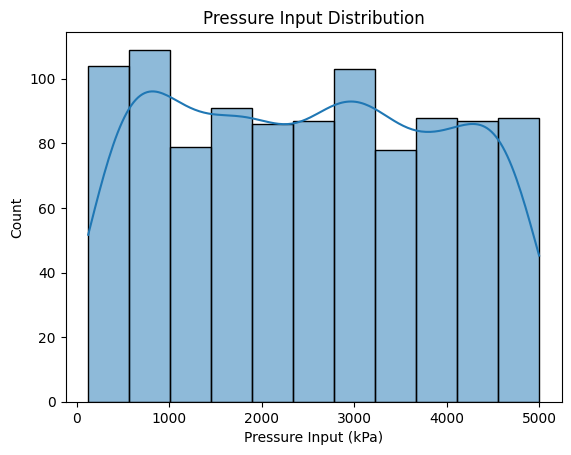

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Pressure Input
sns.histplot(encoded_data['Pressure Input (kPa)'], kde=True)
plt.title("Pressure Input Distribution")
plt.show()

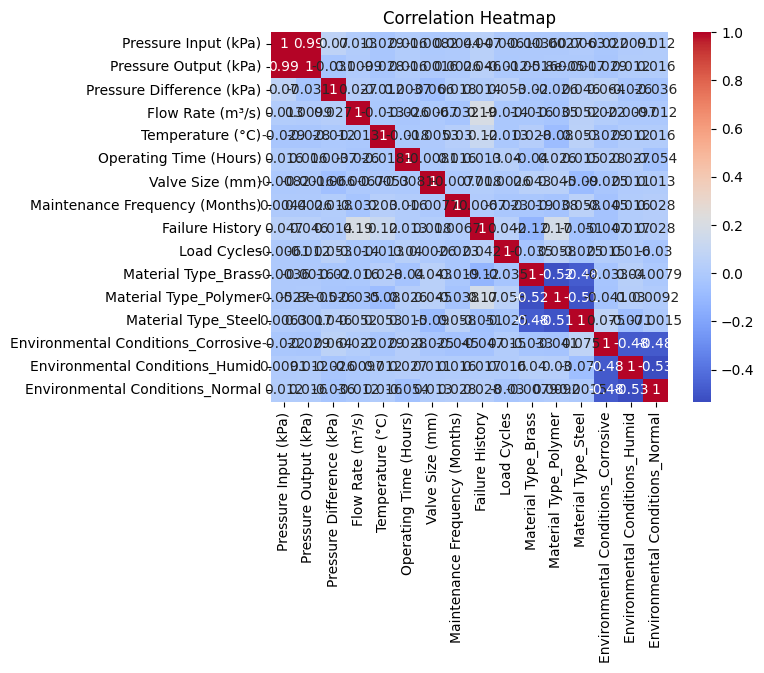

In [25]:
# Correlation heatmap
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Significant Correlations
Pressure Input and Pressure Output (0.99)
Interpretation:
A strong positive correlation indicates that as input pressure increases, the output pressure also increases. This reflects the fundamental behavior of the pressure regulation mechanism.

Pressure Input and Pressure Difference (-0.99)
Interpretation:
The strong negative correlation suggests that as input pressure rises, the pressure difference decreases, possibly due to the valve's regulation process.

Maintenance Frequency and Failure History (0.70)
Interpretation:
A positive correlation implies that systems with more frequent maintenance have a higher recorded failure history.
ons. Consider using it in your feature importance analysis.

In [27]:
encoded_data.columns

Index(['Pressure Input (kPa)', 'Pressure Output (kPa)',
       'Pressure Difference (kPa)', 'Flow Rate (m³/s)', 'Temperature (°C)',
       'Operating Time (Hours)', 'Valve Size (mm)',
       'Maintenance Frequency (Months)', 'Failure History', 'Load Cycles',
       'Material Type_Brass', 'Material Type_Polymer', 'Material Type_Steel',
       'Environmental Conditions_Corrosive', 'Environmental Conditions_Humid',
       'Environmental Conditions_Normal'],
      dtype='object')

In [28]:
df = encoded_data.copy()


In [29]:


# Derived Features
df["Pressure Ratio"] = df["Pressure Input (kPa)"] / df["Pressure Output (kPa)"]
df["Normalized Pressure Difference"] = df["Pressure Difference (kPa)"] / df["Pressure Input (kPa)"]

# Categorize Maintenance Frequency into Low, Medium, and High
df["Maintenance Category"] = pd.qcut(
    df["Maintenance Frequency (Months)"], 
    q=3, 
    labels=["Low", "Medium", "High"]
)



In [30]:
# Save the updated dataset (optional)
df.to_csv(r'C:\Users\Yibabe\Desktop\prv_damage_prediction\data\encoded_data_with_features.csv', index=False)


prepare the given data for  the modelling phase

In [61]:
# Temporarily replace 'inf' and '-inf' with NaN for proper mean calculation
df['Pressure Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the mean or median of the column (excluding NaN)
mean_pressure_ratio = df['Pressure Ratio'].mean()  # Or df['Pressure Ratio'].median()

# Replace NaN back with the calculated mean
df['Pressure Ratio'].fillna(mean_pressure_ratio, inplace=True)


In [80]:
df.head(20)

,Pressure Input (kPa),Pressure Output (kPa),Pressure Difference (kPa),Flow Rate (m³/s),Temperature (°C),Operating Time (Hours),Valve Size (mm),Maintenance Frequency (Months),Failure History,Load Cycles,Material Type_Brass,Material Type_Polymer,Material Type_Steel,Environmental Conditions_Corrosive,Environmental Conditions_Humid,Environmental Conditions_Normal,Pressure Ratio,Normalized Pressure Difference,Maintenance Category
0,1935,1842,92,2,54,35469,158,24,0,828450,1,0,0,1,0,0,1.050489,0.047545,Medium
1,4758,4487,270,2,71,5270,143,4,0,45705,0,0,1,0,1,0,1.060397,0.056747,Low
2,3686,3250,436,9,-4,41942,168,12,0,816446,0,0,1,0,1,0,1.134154,0.118285,Low
3,3033,2667,366,2,47,33550,20,22,1,342136,0,1,0,0,0,1,1.137233,0.120673,Medium
4,864,461,403,2,40,34851,152,20,0,856691,0,1,0,0,1,0,1.874187,0.466435,Medium
5,864,534,329,7,76,18149,171,18,0,340493,0,0,1,0,0,1,1.617978,0.380787,Medium
6,384,38,346,4,86,43963,64,1,1,226885,0,0,1,0,1,0,10.105263,0.901042,Low
7,4344,3919,424,7,-38,36268,131,30,0,167849,1,0,0,1,0,0,1.108446,0.097606,High
8,3045,2920,124,0,54,5629,69,33,0,272205,0,1,0,0,1,0,1.042808,0.040722,High
9,3569,3324,244,4,-32,20388,192,24,0,471809,1,0,0,0,0,1,1.073706,0.068366,Medium


Model Training : Define Target and Features

In [64]:
# Define target and features
target = "Failure History"
features = [
    'Pressure Input (kPa)', 'Pressure Output (kPa)', 'Pressure Difference (kPa)',
    'Flow Rate (m³/s)', 'Temperature (°C)', 'Operating Time (Hours)',
    'Valve Size (mm)', 'Maintenance Frequency (Months)', 'Load Cycles',
    'Material Type_Brass', 'Material Type_Polymer', 'Material Type_Steel',
    'Environmental Conditions_Corrosive', 'Environmental Conditions_Humid',
    'Environmental Conditions_Normal', 'Pressure Ratio', 'Normalized Pressure Difference'
]

X = df[features]
y = df[target]


Train-Test Split
Split the data into training (80%) and testing (20%) subsets.

In [65]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (800, 17)
Testing Set Shape: (200, 17)


In [66]:
X_train.head()

,Pressure Input (kPa),Pressure Output (kPa),Pressure Difference (kPa),Flow Rate (m³/s),Temperature (°C),Operating Time (Hours),Valve Size (mm),Maintenance Frequency (Months),Load Cycles,Material Type_Brass,Material Type_Polymer,Material Type_Steel,Environmental Conditions_Corrosive,Environmental Conditions_Humid,Environmental Conditions_Normal,Pressure Ratio,Normalized Pressure Difference
29,327,0,327,6,48,22033,153,28,20449,0,1,0,1,0,0,1.343388,1.000000
535,4729,4668,60,8,-21,15224,143,22,295044,0,0,1,0,0,1,1.013068,0.012688
695,3092,3057,34,5,-35,30162,22,11,810373,0,1,0,0,0,1,1.011449,0.010996
557,241,35,205,3,28,8401,46,35,963814,0,1,0,0,0,1,6.885714,0.850622
836,4582,4518,64,9,90,2558,25,33,117287,1,0,0,1,0,0,1.014166,0.013968


 Train a Random Forest Model

Train a Random Forest Classifier on the training data.

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

print("Model Training Completed!")


Model Training Completed!


In [68]:
rf_model.score(X_test,y_test)

0.86

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [71]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       174
           1       0.00      0.00      0.00        26

    accuracy                           0.86       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.76      0.86      0.80       200



In [72]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[172   2]
 [ 26   0]]


In [74]:
# Predict probabilities for the test set
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (failure)



In [81]:
# Example output
for i in range(7):  # Display probabilities for the first 5 test samples
    print(f"Sample {i + 1}: Predicted Probability of Failure: {y_prob[i]:.2f}")

Sample 1: Predicted Probability of Failure: 0.03
Sample 2: Predicted Probability of Failure: 0.02
Sample 3: Predicted Probability of Failure: 0.22
Sample 4: Predicted Probability of Failure: 0.01
Sample 5: Predicted Probability of Failure: 0.01
Sample 6: Predicted Probability of Failure: 0.10
Sample 7: Predicted Probability of Failure: 0.07


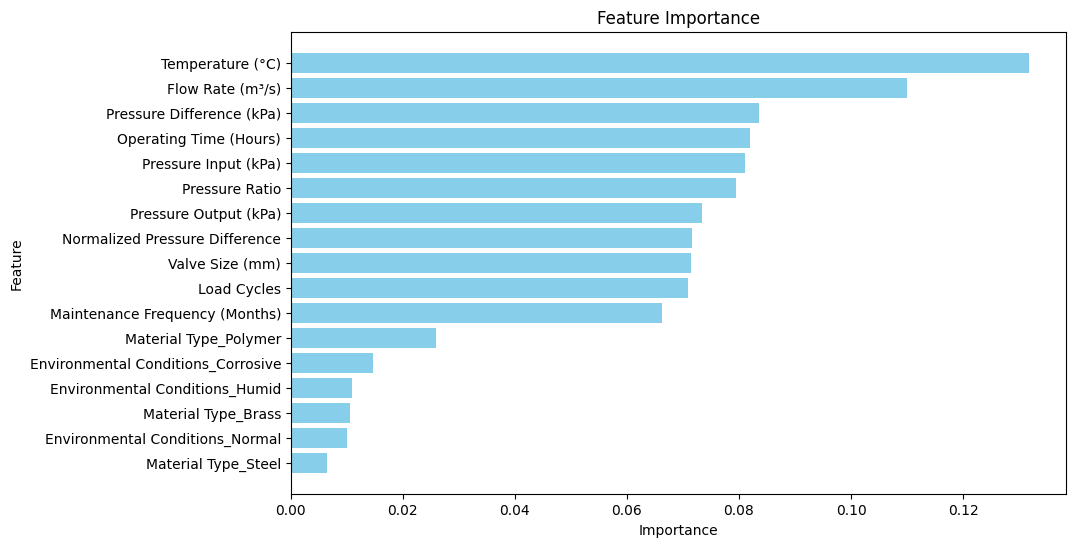

In [77]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf_model.feature_importances_
features = X_train.columns  # Replace with your feature column names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [82]:
# Define a threshold for classifying a failure
threshold = 0.10

# Classify failure based on the predicted probability
y_pred_class = (y_prob >= threshold).astype(int)

# Print predictions with classification (Failure or No Failure)
for i in range(10):  # Display for the first 5 test samples
    print(f"Sample {i + 1}: Probability of Failure: {y_prob[i]:.2f} -> {'Failure' if y_pred_class[i] == 1 else 'No Failure'}")


Sample 1: Probability of Failure: 0.03 -> No Failure
Sample 2: Probability of Failure: 0.02 -> No Failure
Sample 3: Probability of Failure: 0.22 -> Failure
Sample 4: Probability of Failure: 0.01 -> No Failure
Sample 5: Probability of Failure: 0.01 -> No Failure
Sample 6: Probability of Failure: 0.10 -> Failure
Sample 7: Probability of Failure: 0.07 -> No Failure
Sample 8: Probability of Failure: 0.03 -> No Failure
Sample 9: Probability of Failure: 0.07 -> No Failure
Sample 10: Probability of Failure: 0.05 -> No Failure


In [83]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate model performance using adjusted threshold
y_pred_class = (y_prob >= 0.1).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred_class)
print("Classification Report:\n", class_report)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")


Confusion Matrix:
 [[118  56]
 [  6  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79       174
           1       0.26      0.77      0.39        26

    accuracy                           0.69       200
   macro avg       0.61      0.72      0.59       200
weighted avg       0.86      0.69      0.74       200

ROC-AUC: 0.76


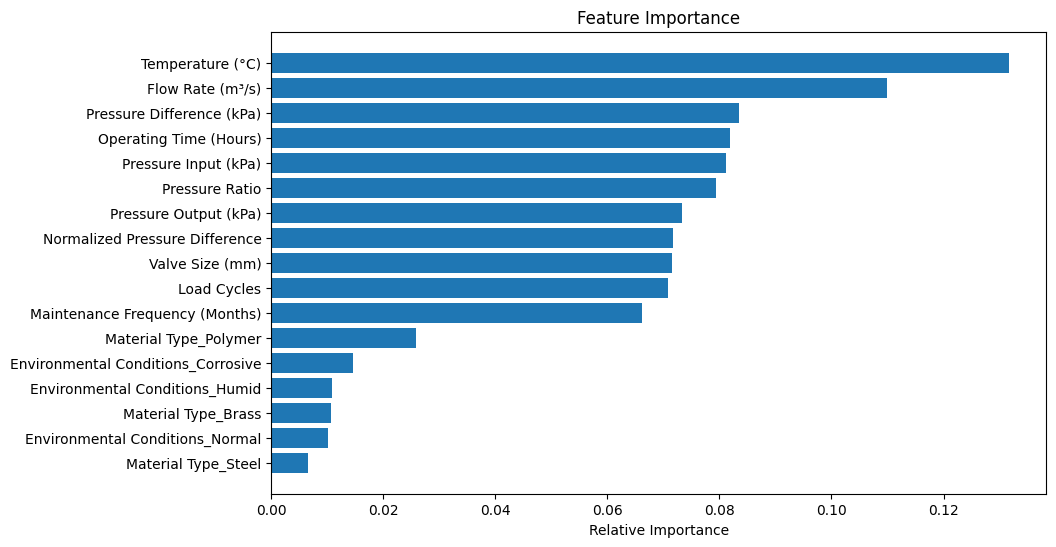

In [84]:
import matplotlib.pyplot as plt

# Visualize feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [85]:
import joblib

# Save the trained model to a file
model_filename = 'pressure_regulating_valve_model.joblib'
joblib.dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to pressure_regulating_valve_model.joblib


In [87]:
X_train.columns

Index(['Pressure Input (kPa)', 'Pressure Output (kPa)',
       'Pressure Difference (kPa)', 'Flow Rate (m³/s)', 'Temperature (°C)',
       'Operating Time (Hours)', 'Valve Size (mm)',
       'Maintenance Frequency (Months)', 'Load Cycles', 'Material Type_Brass',
       'Material Type_Polymer', 'Material Type_Steel',
       'Environmental Conditions_Corrosive', 'Environmental Conditions_Humid',
       'Environmental Conditions_Normal', 'Pressure Ratio',
       'Normalized Pressure Difference'],
      dtype='object')